In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [42]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #50,000 trainig sample, 32x32, 3 rgb color
X_train.shape #data sets from tensorflow
# we are doing classification on only 10 images

(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [34]:
y_train.shape #50000 samples, 1d array


(50000,)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [37]:
y_train = y_train.reshape(-1,) #in numpy to reshape we use reshape function u dont want to change dimension u say -1 so it will remain 10000(test shape) 
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [75]:
classes[2]

'bird'

In [76]:
def plot_sample( X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

TypeError: ignored

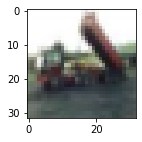

In [77]:
plot_sample(X_train, y_train, 2)


### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification


In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'), #3000 neurons
        layers.Dense(1000, activation='relu'), #1000 neurons
        layers.Dense(10, activation='softmax')    #last layer say we have 10 categories
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 69s 44ms/step - loss: 2.3010 - accuracy: 0.1252
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 2.2999 - accuracy: 0.1310
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 2.2990 - accuracy: 0.1342
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 2.2981 - accuracy: 0.1538
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 2.2971 - accuracy: 0.1527


In [21]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 2.2961 - accuracy: 0.1318


[2.296114921569824, 0.13179999589920044]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.13      0.20      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.25      0.00      0.00      1000
           4       0.16      0.32      0.22      1000
           5       0.00      0.00      0.00      1000
           6       0.33      0.00      0.00      1000
           7       0.11      0.80      0.19      1000
           8       0.00      0.00      0.00      1000
           9       0.28      0.06      0.10      1000

    accuracy                           0.13     10000
   macro avg       0.16      0.13      0.07     10000
weighted avg       0.16      0.13      0.07     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),#it will detect 32 diffferent edges/feature in an image.
    #3x3 kernel or fikter
    layers.MaxPooling2D((2, 2)), #relu is less expensive
    #2nd layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(), #network can automate shape automatically so u dont need to figure out the shape
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')#activation function
])

In [51]:
cnn.compile(optimizer='adam', #adam give good accuracy
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5058 - accuracy: 0.4551
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1524 - accuracy: 0.5970
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0324 - accuracy: 0.6415
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.9552 - accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8946 - accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8499 - accuracy: 0.7046
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8000 - accuracy: 0.7223
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7648 - accuracy: 0.7345
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7349 - accuracy: 0.7450
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [53]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.9175 - accuracy: 0.6891


[0.9174596667289734, 0.6891000270843506]

In [54]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.6001316e-03, 1.2979556e-04, 1.2883801e-03, 4.8876244e-01,
        2.0407970e-04, 2.7707857e-01, 1.4514119e-02, 4.7972752e-04,
        2.0583102e-01, 3.1117224e-03],
       [5.7931110e-04, 3.9911747e-02, 4.7814705e-05, 1.1575022e-05,
        4.2220194e-07, 2.4457731e-06, 5.8182109e-06, 2.3977873e-07,
        9.5737141e-01, 2.0692071e-03],
       [3.3390917e-02, 2.3887862e-01, 1.7045854e-03, 9.5870821e-03,
        7.4658426e-04, 1.9620387e-03, 7.9831301e-04, 2.9628740e-03,
        6.5171611e-01, 5.8252912e-02],
       [2.6517695e-01, 5.4579329e-01, 1.9038869e-03, 1.2681689e-03,
        7.3875440e-04, 1.8121350e-04, 2.8697131e-04, 2.2007513e-04,
        1.8153256e-01, 2.8982135e-03],
       [8.4239191e-06, 4.0967352e-04, 2.0252649e-02, 3.7115194e-02,
        3.4075978e-01, 1.2600963e-02, 5.8843809e-01, 2.9374507e-05,
        3.5612236e-04, 2.9766432e-05]], dtype=float32)

In [55]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 1, 6]

In [56]:
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

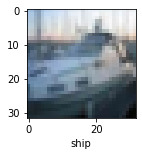

In [78]:
plot_sample(X_test, y_test,2)


In [74]:
classes[y_classes[2]]


'ship'